The Keras functional API is a way to create models that are more flexible than the keras.Sequential API. The functional API can handle models with **non-linear topology**, shared layers, and even multiple inputs or outputs.

# Example:

product name is **iphone 15**

1. Meta data (tabular data)
2. Description (text)
3. Image of the product (image Based data)

Naive approach:
 3 seperate network for the different data and then will give final answer based on output

Functional approach:

Create 1 network and concatenate the three data and predict the final output

    
    

In [5]:
import numpy as np
import tensorflow as tf
import keras
from keras.layers import *
from keras.models import Model


based on 3 column
salary, weight, married/status

target = age(continuous) and place (categorical)

In [7]:

model = Model()
X =Input(shape=(3,1))

In [9]:

hidden1 = Dense(128,activation='relu')(X)

hidden2 = Dense(64,activation='relu')(hidden1)

output1 = Dense(1,activation='linear')(hidden2)

output2 = Dense(1,activation='sigmoid')(hidden2)

In [11]:
model = Model(inputs = X,outputs =[output1,output2])

In [12]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 3, 1)]               0         []                            
                                                                                                  
 dense_4 (Dense)             (None, 3, 128)               256       ['input_2[0][0]']             
                                                                                                  
 dense_5 (Dense)             (None, 3, 64)                8256      ['dense_4[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 3, 1)                 65        ['dense_5[0][0]']             
                                                                                            

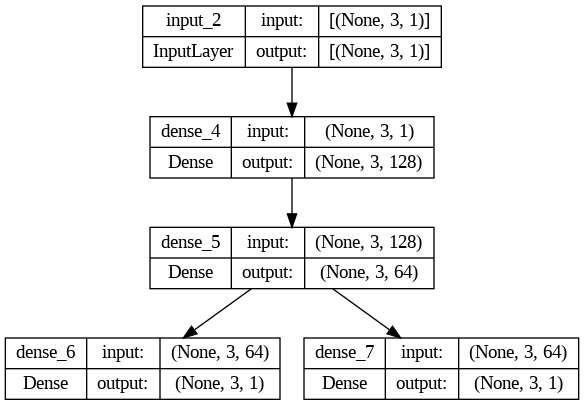

In [14]:
from keras.utils import plot_model

plot_model(model,show_shapes = True)

In [15]:
inputA = Input(shape=(32,))
inputB = Input(shape = (128,))

# Creating a branch for input A

X = Dense(8, activation="relu")(inputA)
X1 = Dense(4, activation="relu")(X)


# Creating a branch for input B

y=  Dense(68, activation="relu")(inputB)
y1 = Dense(34,activation="relu")(y)
y2 = Dense(34,activation="relu")(y1)


In [16]:
# Concatenate to create one output
combined_value = concatenate([X1,y2])

In [17]:
z = Dense(2, activation= "relu")(combined_value)
z1 = Dense(1,activation="linear")(z)

In [21]:
model = Model(inputs = [inputA,inputB],outputs = z1)

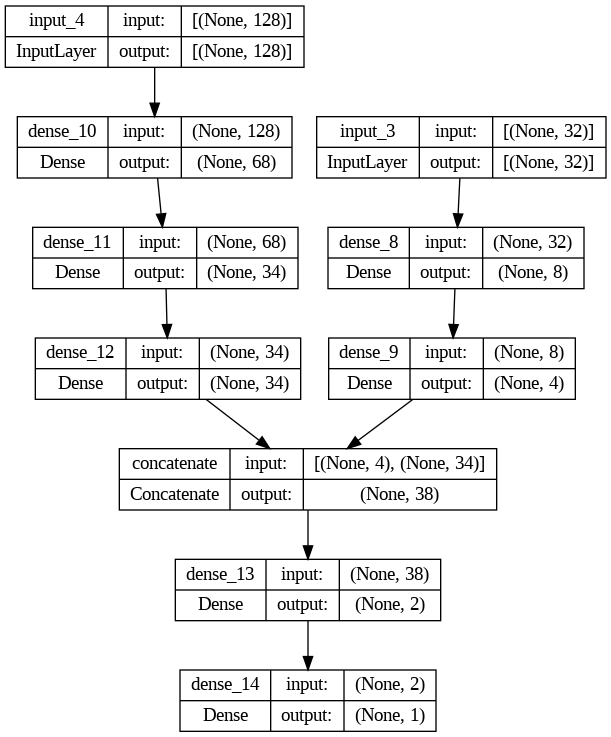

In [22]:
from keras.utils import plot_model

plot_model(model,show_shapes = True)


# Working with kaggle Dataset

https://www.kaggle.com/datasets/jangedoo/utkface-new

### `UTKFace`

### `20k+ cropped face images with age, gender and ethnicity`

In [23]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/


In [24]:
!kaggle datasets download -d jangedoo/utkface-new

 94% 313M/331M [00:02<00:00, 162MB/s]
100% 331M/331M [00:02<00:00, 154MB/s]


In [26]:
import zipfile
zip_ref = zipfile.ZipFile('/content/utkface-new.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [28]:
import os
path = "/content/drive/MyDrive/Kaggle/utkface_aligned_cropped/UTKFace"

age =[]
gender = []
img_path = []

for file in os.listdir(path):
  age.append(int(file.split("_")[0]))
  gender.append(int(file.split("_")[1]))
  img_path.append(file)

In [29]:
len(age)

23708

In [33]:
import pandas as pd
dataframe = pd.DataFrame({"age":age,"gender":gender,"img":img_path})

In [34]:
dataframe

,age,gender,img
0,29,0,29_0_1_20170113134817225.jpg.chip.jpg
1,26,0,26_0_4_20170117200626708.jpg.chip.jpg
2,48,1,48_1_0_20170110152853674.jpg.chip.jpg
3,22,1,22_1_4_20161221195925096.jpg.chip.jpg
4,42,0,42_0_0_20170117154810113.jpg.chip.jpg
...,...,...,...
23703,31,0,31_0_0_20170104201545729.jpg.chip.jpg
23704,22,1,22_1_2_20170116172702296.jpg.chip.jpg
23705,1,0,1_0_2_20170117195243732.jpg.chip.jpg
23706,34,0,34_0_1_20170117010115390.jpg.chip.jpg


In [36]:
dataframe.sample(frac=1, random_state =0)

,age,gender,img
15426,35,0,35_0_2_20170117191008778.jpg.chip.jpg
14084,26,1,26_1_2_20170116184100913.jpg.chip.jpg
22319,90,0,90_0_0_20170111205428761.jpg.chip.jpg
19518,2,1,2_1_2_20161219155732445.jpg.chip.jpg
2255,3,1,3_1_3_20161219230521112.jpg.chip.jpg
...,...,...,...
13123,67,0,67_0_0_20170120224536320.jpg.chip.jpg
19648,14,0,14_0_2_20170103201051263.jpg.chip.jpg
9845,26,1,26_1_2_20170116171202584.jpg.chip.jpg
10799,21,1,21_1_4_20161223225837372.jpg.chip.jpg


In [37]:
train = dataframe.sample(frac=1, random_state =0).iloc[:20000]
test = dataframe.sample(frac =1,random_state = 0).iloc[20000:]

In [38]:
train.shape

(20000, 3)

In [39]:
test.shape

(3708, 3)

In [40]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)



test_datagen = ImageDataGenerator(rescale=1./255)

In [41]:
train_gen = train_datagen.flow_from_dataframe(train,
                                              directory = path,
                                              x_col ='img',
                                              y_col = ['age','gender'],
                                              target_size =(200,200),
                                              class_mode='multi_output')


test_gen = test_datagen.flow_from_dataframe(test,
                                              directory = path,
                                              x_col ='img',
                                              y_col = ['age','gender'],
                                              target_size =(200,200),
                                              class_mode='multi_output')


Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [43]:
from keras.applications.resnet50 import ResNet50

In [45]:
resnet = ResNet50(include_top = False, input_shape = (200,200,3))

94765736/94765736 [==============================] - 1s 0us/step


In [46]:
resnet.trainable = False

In [51]:
output = resnet.layers[-1].output

In [52]:
flatten = Flatten()(output)

dense1 = Dense(512,activation = "relu")(flatten)
dense2 = Dense(512, activation = "relu")(flatten)

dense3 = Dense(512, activation = "relu")(dense1)
dense4 = Dense(512, activation= "relu")(dense2)

output1 = Dense(1, activation = 'linear', name = 'age')(dense3)
output2 = Dense(1, activation = 'sigmoid', name = 'gender')(dense4)

In [53]:
model = Model(inputs= resnet.input, outputs = [output1,output2])

In [54]:
model.compile(optimizer = 'adam',loss ={"age":"mse","gender":"binary_crossentropy"},metrics = {"age":"mse","gender":"accuracy"})

In [55]:
model.fit(train_gen, batch_size = 64,epochs =2, validation_data= test_gen)

Epoch 1/2
625/625 [==============================] - 308s 472ms/step - loss: 413.2638 - age_loss: 412.4723 - gender_loss: 0.7916 - age_mse: 412.4723 - gender_accuracy: 0.5131 - val_loss: 367.2062 - val_age_loss: 366.5148 - val_gender_loss: 0.6915 - val_age_mse: 366.5148 - val_gender_accuracy: 0.5340
Epoch 2/2
625/625 [==============================] - 291s 465ms/step - loss: 397.3616 - age_loss: 396.6665 - gender_loss: 0.6949 - age_mse: 396.6665 - gender_accuracy: 0.5205 - val_loss: 391.0862 - val_age_loss: 390.3947 - val_gender_loss: 0.6914 - val_age_mse: 390.3947 - val_gender_accuracy: 0.5340


In [56]:
model.save('/content/drive/MyDrive/Kaggle/utkface_aligned_cropped/face_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
import cv2
import matplotlib.pyplot as plt

In [60]:
old_man = cv2.imread('/content/drive/MyDrive/Kaggle/utkface_aligned_cropped/UTKFace/100_0_0_20170112213500903.jpg.chip.jpg')

old_man.shape

(200, 200, 3)

In [62]:
old_man_resized = cv2.resize(old_man, (200,200))

In [63]:
img = old_man_resized.reshape(1,200,200,3)

In [64]:
model.predict(img)

1/1 [==============================] - 3s 3s/step


[array([[4.542855]], dtype=float32), array([[0.23700425]], dtype=float32)]